<a href="https://colab.research.google.com/github/barrosyan/computational_physics_studies/blob/main/Navier_Stokes_Cavidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudando implementação de Navier-Stokes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time, sys

In [2]:
%matplotlib inline

# Convecção linear com avanço à partir da condição inicial (CI) e condições de contorno (CC) apropriadas.

In [ ]:
x = np.linspace(0,2,41) # Domínio

nt = 25 # Número de passos
dt = .025 # Tamanho de cada passo
c = 1 # Velocidade de propagação da onda

In [ ]:
nx = x.size # Número de pontos na malha
dx = x[1] - x[0] # Espaçamento entre os pontos

In [ ]:
u = np.ones_like(x) # Array de 1's com mesma dimensão do x
u[(0.5<=x) & (x<=1)] = 2 # Condição inicial para velocidade - Entre 1 e 0.5, recebe 2, caso contrário recebe 1 - Função chapéu

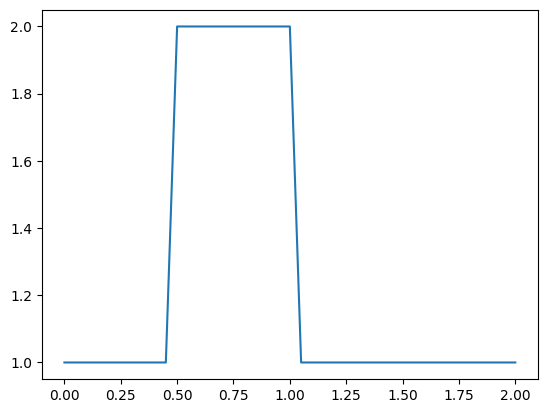

In [ ]:
plt.plot(x, u)

In [ ]:
# Implementando a equação de convecção discretivada por diferenças finitas
un = np.ones_like(u) # Criando o arranjo temporário

for n in range(nt):
  un = u.copy()
  for i in range(1, nx):
    u[i] = un[i] - c*dt / dx*(un[i] - un[i-1])

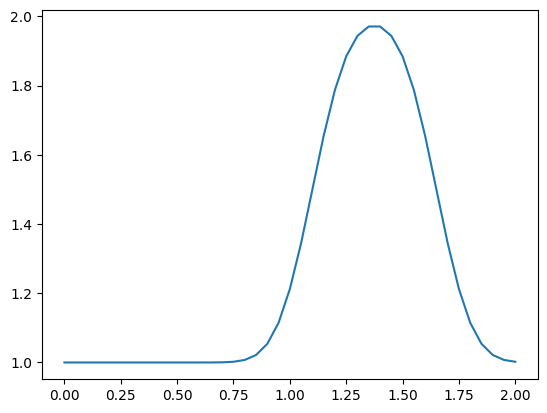

In [ ]:
plt.plot(x,u)

# Convecção não linear com avanço à partir da condição inicial (CI) e condições de contorno (CC) apropriadas.

In [ ]:
x = np.linspace(0, 2, 41)
nt = 20
dt = .025

nx = x.size
dx = x[1] - x[0]
u = np.ones_like(x)
u[(0.5<=x) & (x<=1)] = 2

un = np.ones_like(u)

In [ ]:
for n in range(nt):
  un = u.copy()
  for i in range(1, nx):
    c=un[i]
    u[i] = un[i] - c*dt / dx*(un[i] - un[i-1])

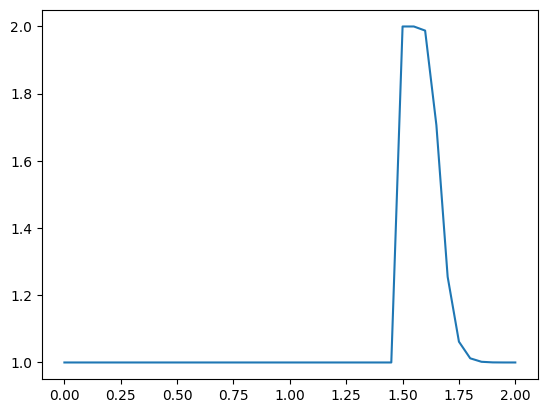

In [ ]:
plt.plot(x, u)

# Difusão Unidimensional

In [ ]:
x = np.linspace(0.,2.,41)
nt = 20
nu = 0.3
sigma = .2

In [ ]:
nx = x.size
dx = x[1] - x[0]
dt = sigma*dx**2/nu

In [ ]:
u = np.ones(nx)
u[(0.5<=x) & (x<=1)] = 2

un = np.ones(nx)

In [ ]:
for n in range(nt):
  un = u.copy()
  for i in range(1, nx-1):
    u[i] = un[i] + nu*dt/dx**2 * (un[i+1] - 2 * un[i] + un[i-1])

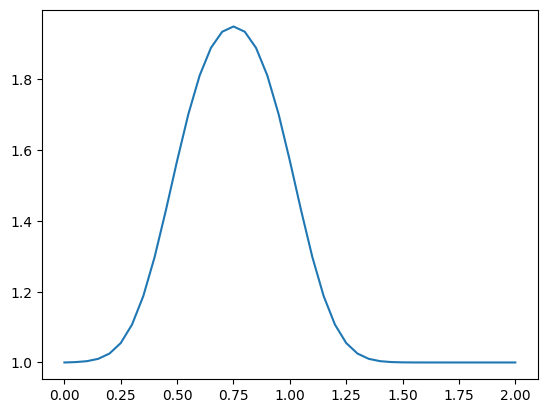

In [ ]:
plt.plot(x, u)

# Equação de Burgers

In [ ]:
import sympy
from sympy import init_printing
from sympy.utilities.lambdify import lambdify

In [ ]:
init_printing(use_latex=True)

In [ ]:
x, nu, t = sympy.symbols ('x nu t')
phi = (sympy.exp(-(x-4*t)**2/(4*nu*(t+1)))+
      sympy.exp(-(x-4*t-2*sympy.pi)**2/(4*nu*(t+1))))
phi

                  2                2 
 -(-4⋅t + x - 2⋅π)      -(-4⋅t + x)  
 ───────────────────    ─────────────
     4⋅ν⋅(t + 1)         4⋅ν⋅(t + 1) 
ℯ                    + ℯ             

In [ ]:
phiprime = phi.diff(x)
phiprime

                           2                                         2 
                -(-4⋅t + x)                         -(-4⋅t + x - 2⋅π)  
                ─────────────                       ───────────────────
                 4⋅ν⋅(t + 1)                            4⋅ν⋅(t + 1)    
  (-8⋅t + 2⋅x)⋅ℯ                (-8⋅t + 2⋅x - 4⋅π)⋅ℯ                   
- ─────────────────────────── - ───────────────────────────────────────
          4⋅ν⋅(t + 1)                         4⋅ν⋅(t + 1)              

In [ ]:
print(phiprime)

-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1))


In [ ]:
u=-2*nu*(phiprime/phi)+4
print(u)

-2*nu*(-(-8*t + 2*x)*exp(-(-4*t + x)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)) - (-8*t + 2*x - 4*pi)*exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1)))/(4*nu*(t + 1)))/(exp(-(-4*t + x - 2*pi)**2/(4*nu*(t + 1))) + exp(-(-4*t + x)**2/(4*nu*(t + 1)))) + 4


In [ ]:
ufunc = lambdify((t,x,nu),u)
print(ufunc(1,4,3))

3.49170664206445


In [ ]:
nx = 101
nt = 100
dx = 2.*(np.pi/(nx-1))
nu = .07
dt = dx*nu

x = np.linspace(0,2*np.pi,nx)
un=np.empty(nx)
t=0

In [ ]:
u = np.asarray([ufunc(t,x0,nu) for x0 in x])
u

array([4.        , 4.06283185, 4.12566371, 4.18849556, 4.25132741,
       4.31415927, 4.37699112, 4.43982297, 4.50265482, 4.56548668,
       4.62831853, 4.69115038, 4.75398224, 4.81681409, 4.87964594,
       4.9424778 , 5.00530965, 5.0681415 , 5.13097336, 5.19380521,
       5.25663706, 5.31946891, 5.38230077, 5.44513262, 5.50796447,
       5.57079633, 5.63362818, 5.69646003, 5.75929189, 5.82212374,
       5.88495559, 5.94778745, 6.0106193 , 6.07345115, 6.136283  ,
       6.19911486, 6.26194671, 6.32477856, 6.38761042, 6.45044227,
       6.51327412, 6.57610598, 6.63893783, 6.70176967, 6.76460125,
       6.82742866, 6.89018589, 6.95176632, 6.99367964, 6.72527549,
       4.        , 1.27472451, 1.00632036, 1.04823368, 1.10981411,
       1.17257134, 1.23539875, 1.29823033, 1.36106217, 1.42389402,
       1.48672588, 1.54955773, 1.61238958, 1.67522144, 1.73805329,
       1.80088514, 1.863717  , 1.92654885, 1.9893807 , 2.05221255,
       2.11504441, 2.17787626, 2.24070811, 2.30353997, 2.36637

(0.0, 10.0)

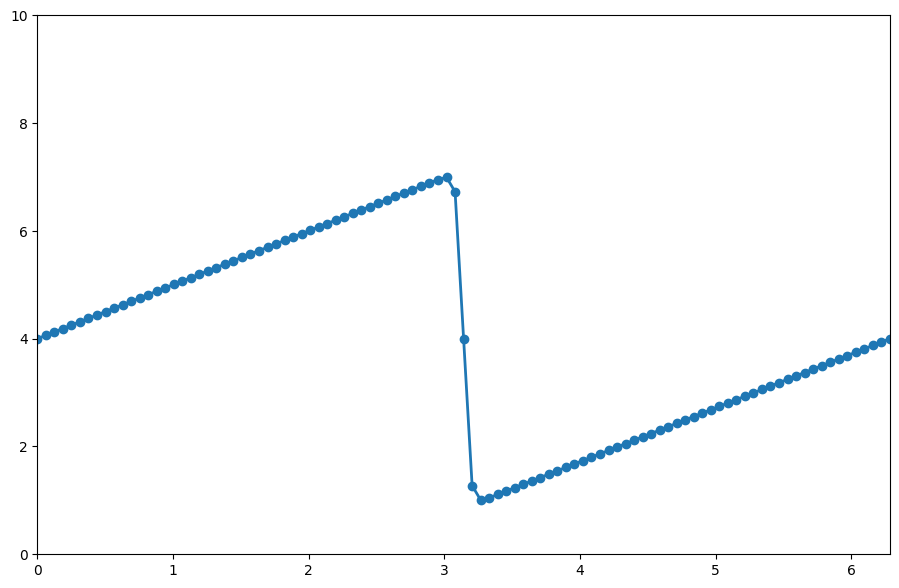

In [ ]:
# SAW-TOOTH FUNCTION
plt.figure(figsize=(11,7),dpi=100)
plt.plot(x,u,marker='o',lw=2)
plt.xlim([0,2*np.pi])
plt.ylim([0,10])

In [ ]:
for n in range(nt):
  un = u.copy()
  for i in range(1, nx-1):
    u[i] = un[i] - un[i]* dt/dx * (un[i] - un[i-1]) + nu * dt/dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
  u[0] = un[0] - un[0]* dt/dx * (un[0] - un[-2]) + nu * dt/dx**2 * (un[1] - 2 * un[0] + un[-2])
  u[-1] = u[0]

u_analytical = np.asarray([ufunc(nt*dt,xi,nu) for xi in x])

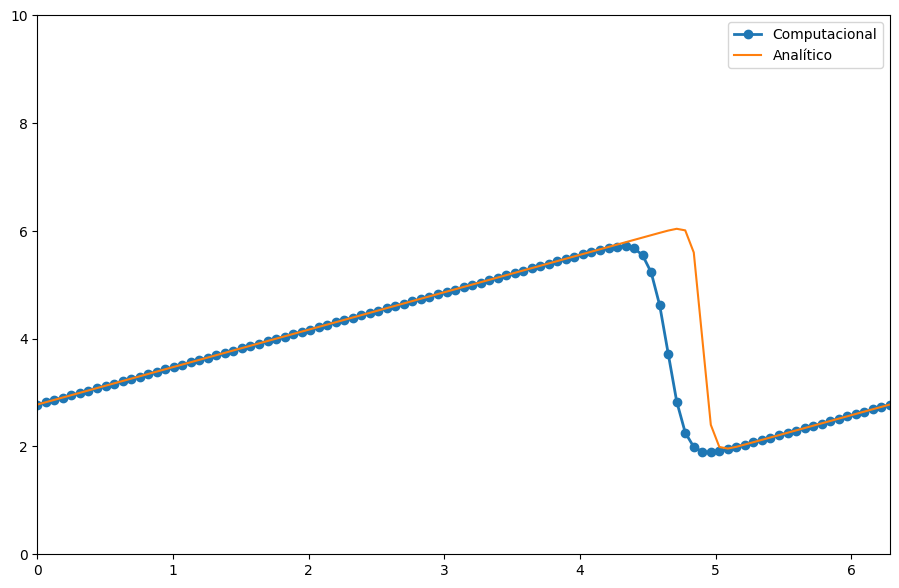

In [ ]:
plt.figure(figsize=(11,7), dpi=100)
plt.plot(x,u,marker='o',lw=2,label='Computacional')
plt.plot(x,u_analytical,label='Analítico')
plt.xlim([0,2*np.pi])
plt.ylim([0,10])
plt.legend()

# Convecção Linear 2D

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
nx = 81
ny = 81
nt = 100
c = 1
dx = 2/(nx-1)
dy = 2/(ny-1)

In [ ]:
sigma = .2
dt = sigma*dx

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((nx,ny))
un = np.ones((nx,ny))

In [ ]:
u[int(.5 / dx):int(1 / dx + 1),int(.5 / dy):int(1 / dy + 1)] = 2

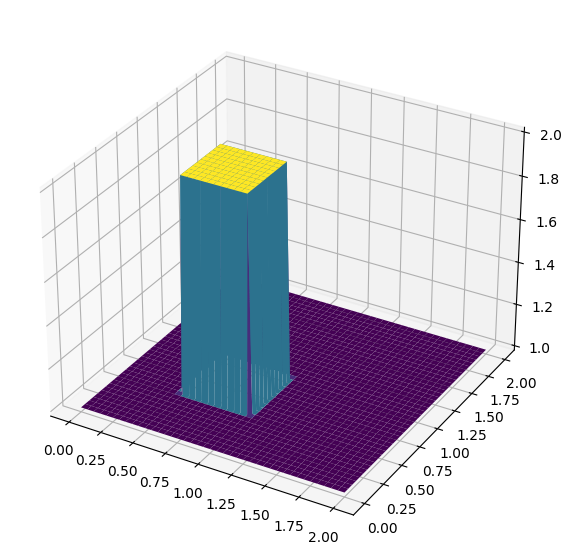

In [ ]:
fig = plt.figure(figsize=(11,7),dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, u[:].T, cmap=cm.viridis)

In [ ]:
u = np.ones((nx,ny))
u[int(.5/dx):int(1/dx+1), int(.5/dy):int(1/dy+1)]=2

In [ ]:
for n in range(nt+1):
  un=u.copy()
  row,col = u.shape
  for i in range(1,row):
    for j in range(1,col):
      u[i,j] = (un[i,j] - (c*dt/dx*(un[i,j] - un[i-1,j])) - (c*dt/dy*(un[i,j]-un[i,j-1])))
      u[0,:] = 1
      u[-1,:] = 1
      u[:,0] = 1
      u[:,-1] = 1

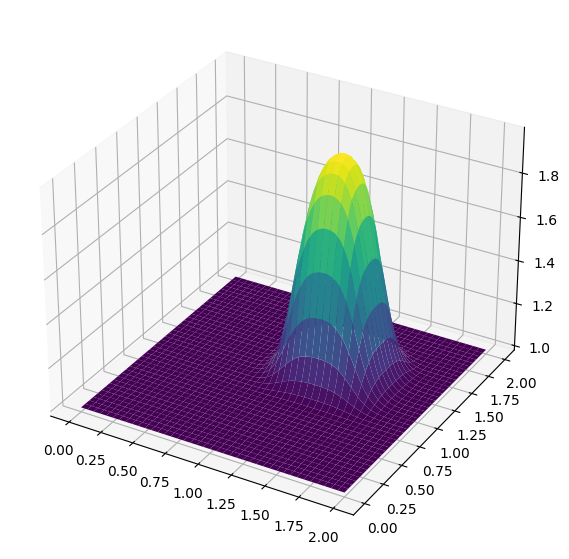

In [ ]:
fig = plt.figure(figsize=(11,7),dpi=100)
ax = fig.add_subplot(111, projection='3d')
surf2 = ax.plot_surface(X, Y, u[:].T, cmap=cm.viridis)

In [ ]:
u = np.ones((nx,ny))
u[int(.5 / dx):int(1/dx+1), int(.5/dy):int(1/dy+1)] = 2

for n in range(nt+1):
  un = u.copy()
  u[1:,1:] = (un[1:,1:] - (c*dt/dx*(un[1:,1:] - un[:-1,1:])) - (c*dt/dy*(un[1:,1:] - un[1:, :-1])))
  u[0,:] = 1
  u[-1,:] = 1
  u[:,0] = 1
  u[:,-1] = 1

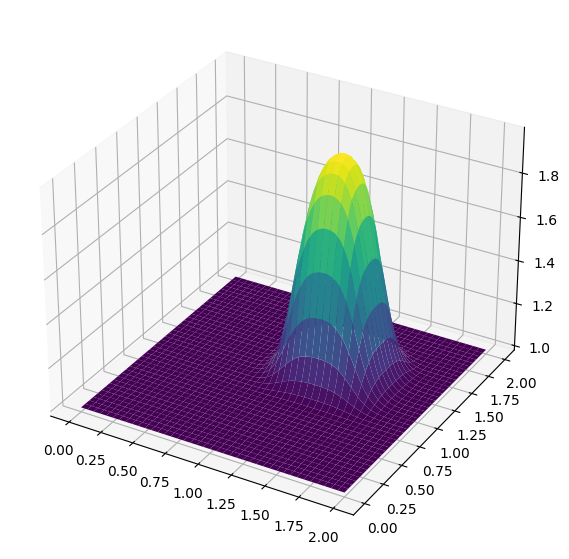

In [ ]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
surf2 = ax.plot_surface(X,Y,u[:].T, cmap=cm.viridis)

# Convecção 2D

In [ ]:
nx = 101
ny = 101
nt = 80
c = 1
dx = 2/(nx - 1)
dy = 2/(ny - 1)
sigma = .2
dt = sigma*dx

In [ ]:
x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((nx,ny))
v = np.ones((nx,ny))
un = np.ones((nx,ny))
vn = np.ones((nx,ny))

In [ ]:
u[int(.5/dx):int(1/dx+1), int(.5/dy):int(1/dy+1)] = 2
v[int(.5/dx):int(1/dx+1), int(.5/dy):int(1/dy+1)] = 2

Text(0.5, 0.5, '$y$')

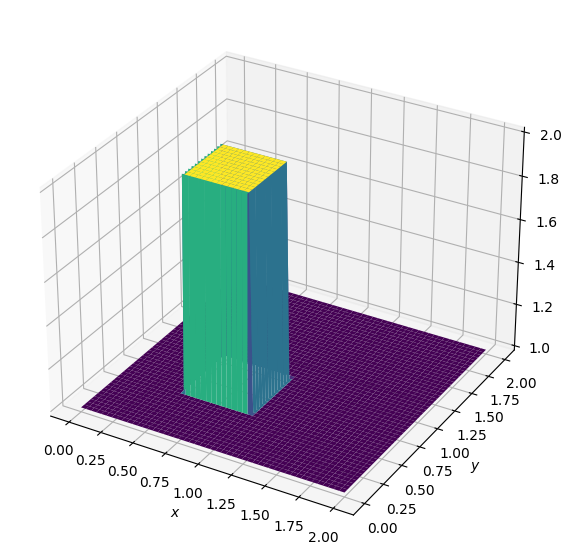

In [ ]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x,y)

ax.plot_surface(X, Y, u.T, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [ ]:
for n in range(nt + 1):
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[:-1, 1:])) - vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[1:, :-1]))
    v[1:, 1:] = (vn[1:, 1:] - (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[:-1, 1:])) - vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[1:, :-1]))

    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

Text(0.5, 0.5, '$y$')

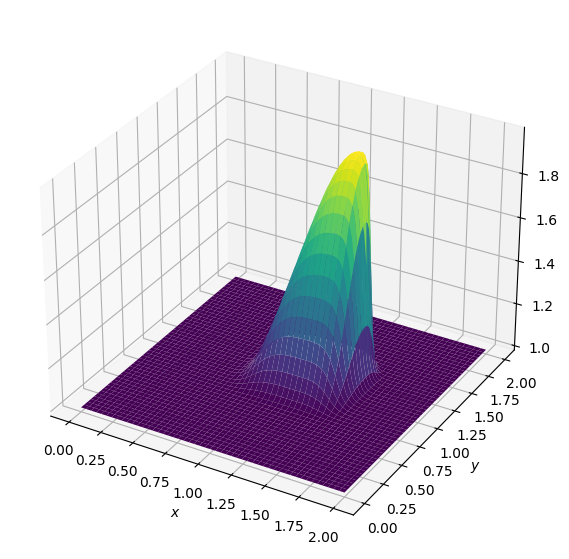

In [ ]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, u.T, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

Text(0.5, 0.5, '$y$')

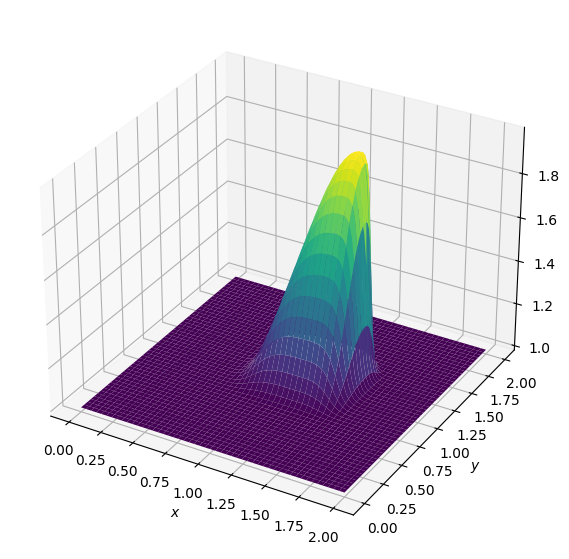

In [ ]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)

ax.plot_surface(X, Y, v.T, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Difusão 2D

In [ ]:
nx = 31
ny = 31
nt = 17
nu = .05
dx = 2/(nx-1)
dy = 2/(ny-1)
sigma = .25
dt = sigma*dx*dy/nu

x = np.linspace(0,2,nx)
y = np.linspace(0,2,ny)

u = np.ones((nx,ny))
un = np.ones((nx,ny))

u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

Text(0.5, 0.5, '$y$')

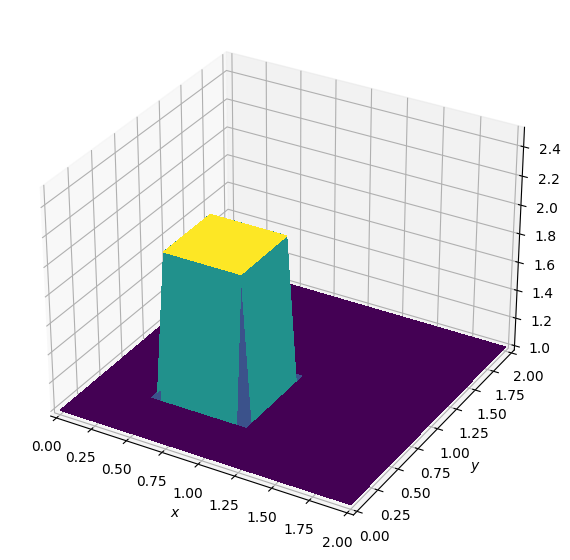

In [ ]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, u.T, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)

ax.set_xlim(0,2)
ax.set_ylim(0,2)
ax.set_zlim(1,2.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [ ]:
def diffuse(nt):
  u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

  for n in range(nt + 1):
    un = u.copy()
    u[1:-1, 1:-1] = (un[1:-1,1:-1] + nu * dt / dx**2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]) +nu * dt / dy**2 * (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

  fig = plt.figure(figsize=(11,7), dpi=100)
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(X, Y, u[:].T, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=True)
  ax.set_zlim(1,2.5)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

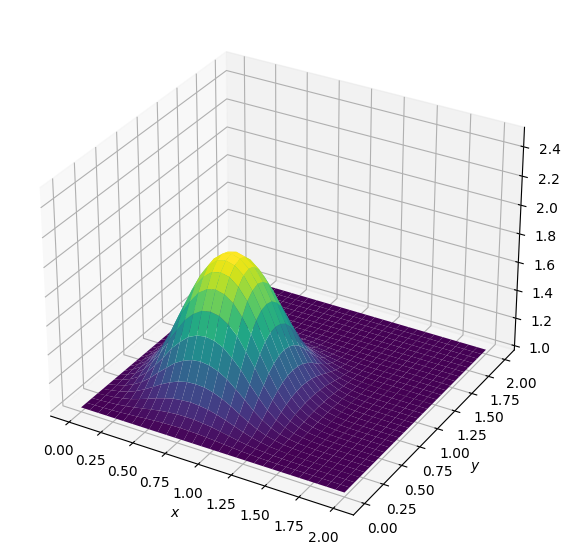

In [ ]:
diffuse(10)

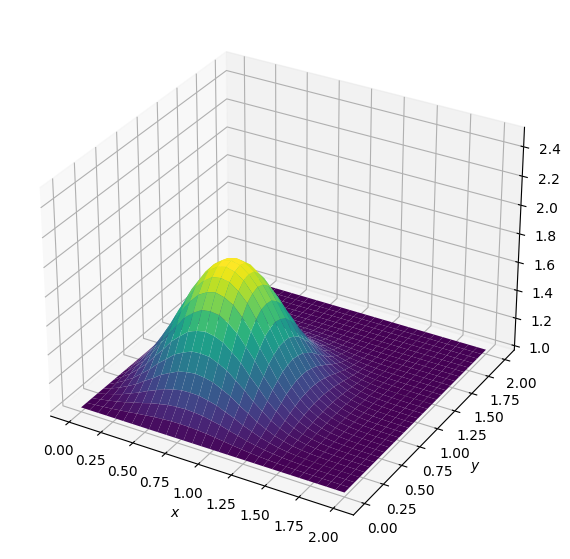

In [ ]:
diffuse(14)

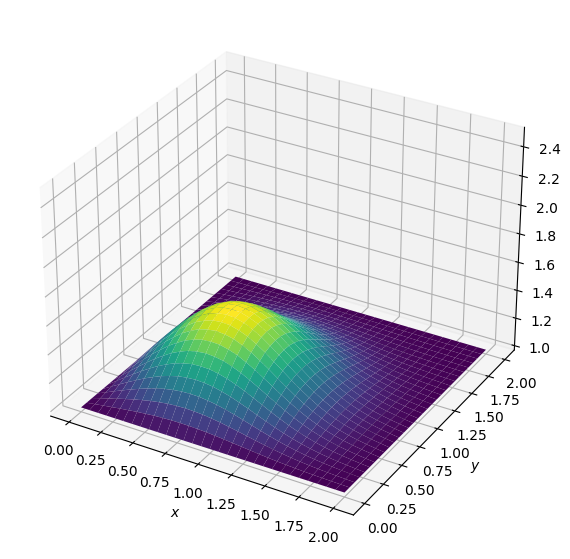

In [ ]:
diffuse(50)

# Equação de Burgers em 2D

In [ ]:
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu

In [ ]:
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((nx, ny))
v = np.ones((nx, ny))
un = np.ones((nx, ny))
vn = np.ones((nx, ny))
comb = np.ones((nx, ny))

In [ ]:
u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2
v[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

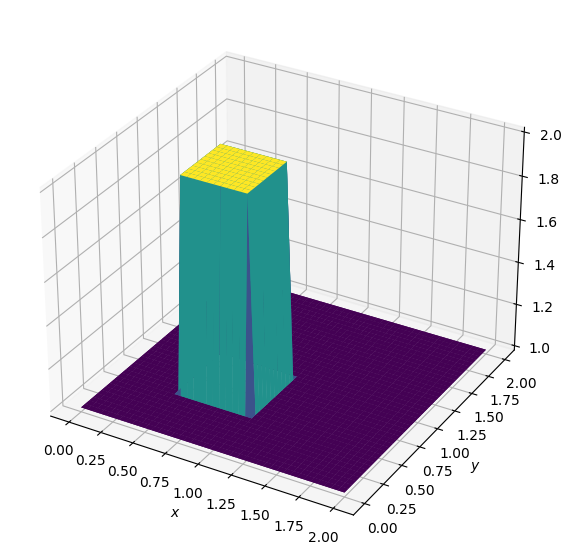

In [ ]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, u[:].T, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:].T, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [ ]:
for n in range(nt+1):
  un = u.copy()
  vn = v.copy()

  u[1:-1,1:-1] = (un[1:-1, 1:-1] -
                  dt/dx*un[1:-1,1:-1]*
                  (un[1:-1,1:-1] - un[0:-2,1:-1]) -
                  dt/dy*vn[1:-1,1:-1]*
                  (un[1:-1,1:-1] - un[1:-1,0:-2])+
                  nu*dt/dx**2*
                  (un[2:,1:-1]-2*un[1:-1,1:-1] + un[0:-2,1:-1]) +
                  nu*dt/dy**2*
                  (un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,0:-2]))

  v[1:-1,1:-1] = (vn[1:-1,1:-1] -
                  dt/dx*un[1:-1,1:-1]*
                  (vn[1:-1,1:-1] - vn[0:-2,1:-1]) -
                  dt/dy*vn[1:-1,1:-1]*
                  (vn[1:-1,1:-1] - vn[1:-1,0:-2])+
                  nu*dt/dx**2*
                  (vn[2:,1:-1]-2*vn[1:-1,1:-1] + vn[0:-2,1:-1]) +
                  nu*dt/dy**2*
                  (vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,0:-2]))

  u[0, : ] = 1
  u[-1, :] = 1
  u[:, 0 ] = 1
  u[:, -1] = 1

  v[0, : ] = 1
  v[-1, :] = 1
  v[:, 0 ] = 1
  v[:, -1] = 1

Text(0.5, 0.5, '$y$')

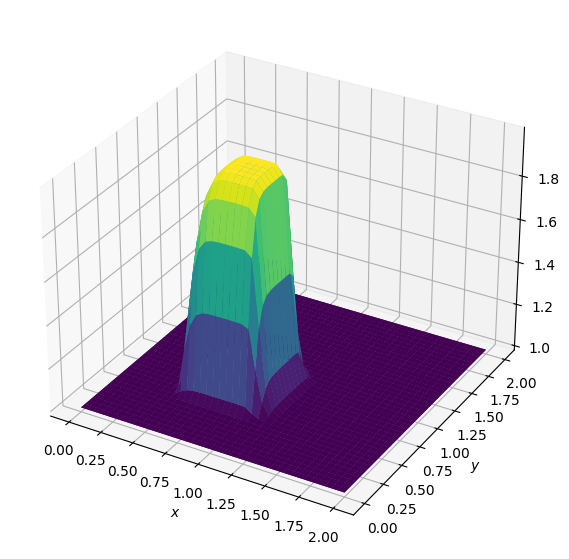

In [ ]:
fig = plt.figure(figsize=(11,7), dpi=100)
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x,y)
ax.plot_surface(X, Y, u.T, cmap=cm.viridis,rstride=1, cstride=1)
ax.plot_surface(X, Y, v.T, cmap=cm.viridis,rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

# Equação de Laplace 2D

In [ ]:
def plot2D(x, y, p):
  fig = plt.figure(figsize=(11,7), dpi=100)
  ax = fig.add_subplot(111, projection='3d')
  X, Y = np.meshgrid(x,y)
  surf = ax.plot_surface(X,Y,p[:].T, rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
  ax.view_init(30,225)
  ax.set_xlabel('$x$')
  ax.set_ylabel('$y$')

In [ ]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = np.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1]) +
                          dx**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2])) /
                        (2 * (dx**2 + dy**2)))

        p[0, :] = 0  # p = 0 @ x = 0
        p[-1, :] = y  # p = y @ x = 2
        p[:, 0] = p[:, 1]  # dp/dy = 0 @ y = 0
        p[:, -1] = p[:, -2]  # dp/dy = 0 @ y = 1
        l1norm = (np.sum(np.abs(p[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))

    return p

In [ ]:
x = np.linspace(0,2,31)
y = np.linspace(0,2,31)
c = 1

nx = x.size
ny = y.size
dx = (x[-1] - x[0])/(nx-1)
dy = (y[-1] - y[0])/(ny-1)

# Condição inicial
p = np.zeros((nx,ny))

# Condições de contorno
p[0, : ] = 0
p[-1, :] = y
p[:, 0 ] = p[:, 1]
p[:, -1 ] = p[:, -2]

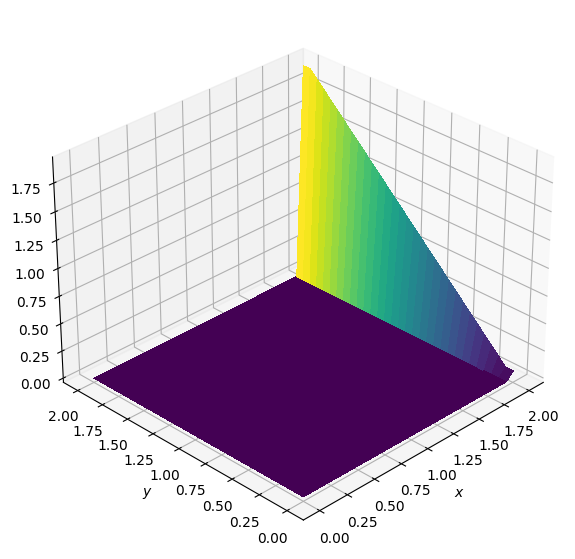

In [ ]:
plot2D(x,y,p)

In [ ]:
p = laplace2d(p, y, dx, dy, 1e-4)

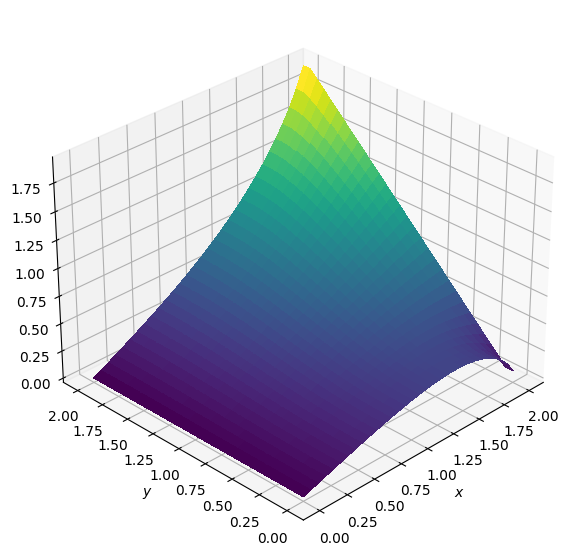

In [ ]:
plot2D(x,y,p)

# Equação de Poisson 2D

In [ ]:
x = np.linspace(0,2,50)
y = np.linspace(0,1,50)
nt = 100

nx = x.size
ny = y.size
dx = (x[-1] - x[0]) / (nx - 1)
dy = (y[-1] - y[0]) / (ny - 1)

In [ ]:
p = np.zeros((nx,ny))
pd = np.zeros((nx,ny))
b = np.zeros((nx,ny))

In [ ]:
b[int(nx/4),int(ny/4)] = 100
b[int(3*nx / 4), int(3*ny / 4)] = -100

In [ ]:
for it in range(nt):
  pd = p.copy()

  p[1:-1, 1:-1] = (((pd[2:, 1:-1] + pd[:-2, 1:-1])* dy**2 +
                    (pd[1:-1,2:] + pd[1:-1,:-2]) * dx**2 -
                     b[1:-1,1:-1] * dx**2 * dy**2)/
                    (2 * (dx**2 + dy**2)))

  p[0,:    ] = 0
  p[nx-1, :] = 0
  p[:, 0   ] = 0
  p[:, ny-1] = 0

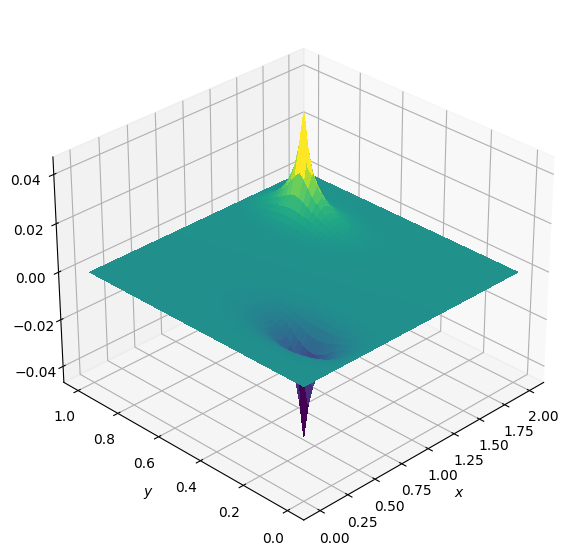

In [ ]:
plot2D(x,y,p)

# Escoamento em cavidade com Navier-Stokes

In [4]:
x = np.linspace(0,2,21)
y = np.linspace(0,2,21)

nt = 500
nit = 50
c = 1
rho = 1
nu = .1
dt = .001

nx = x.size
ny = y.size
dx = (x[-1] - x[0]) / (nx-1)
dy = (y[-1] - y[0]) / (ny-1)

In [5]:
X, Y = np.meshgrid(x,y)

In [6]:
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
p = np.zeros((ny,nx))
b = np.zeros((ny,nx))

In [7]:
def build_up_b(b, rho, dt, u, v, dx, dy):
  b[1:-1, 1:-1] = (rho*(1 / dt *
                  ((u[2:,1:-1] - u[0:-2,1:-1]) /
                  (2*dx) + (v[1:-1, 2:] - v[1:-1,0:-2]) / (2 * dy)) -
                  ((u[2:,1:-1] - u[0:-2,1:-1]) / (2 * dx))**2 -
                   2 * ((u[1:-1,2:]-u[1:-1,0:-2]) / (2*dy) *
                  (v[2:,1:-1] - v[0:-2, 1:-1]) / (2 * dx)) -
                  ((v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dy))**2))

  return b

In [8]:
def pressure_poisson(p, dx, dy, b):
  pn = np.empty_like(p)
  pn = p.copy()

  for q in range(nit):
    pn = p.copy()
    p[1:-1, 1:-1] = (((pn[2:,1:-1] + pn[0:-2, 1:-1]) * dy**2 +
                    (pn[1:-1,2:] + pn[1:-1, 0:-2]) * dx**2) /
                    (2 * (dx**2 + dy**2)) -
                     dx**2 * dy**2 / (2*(dx**2 + dy**2)) *
                     b[1:-1, 1:-1])

    p[-1, :] = p[-2, :]
    p[:, 0 ] = p[:, 1 ]
    p[0, : ] = p[1, :]
    p[:, -1] = 0

    return p

In [9]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))

    for n in range(nt):
        un = u.copy()
        vn = v.copy()

        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)

        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[0:-2,1:-1]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[1:-1,0:-2]) -
                         dt / (2 * rho * dx) * (p[2:,1:-1] - p[0:-2,1:-1]) +
                         nu * (dt / dx**2 *
                        (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1]) +
                         dt / dy**2 *
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1,0:-2])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[0:-2,1:-1]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[1:-1,0:-2]) -
                        dt / (2 * rho * dy) * (p[1:-1,2:] - p[1:-1,0:-2]) +
                        nu * (dt / dx**2 *
                       (vn[2:,1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2,1:-1]) +
                        dt / dy**2 *
                       (vn[1:-1,2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1,0:-2])))

        u[:,0]  = 0
        u[0,:]  = 0
        u[-1,:] = 0
        u[:,-1] = 1
        v[:,0]  = 0
        v[:,-1] = 0
        v[0,:]  = 0
        v[-1,:] = 0


    return u, v, p

In [10]:
u = np.zeros((nx, ny))
v = np.zeros((nx, ny))
p = np.zeros((nx, ny))
b = np.zeros((nx, ny))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

Text(0, 0.5, 'y')

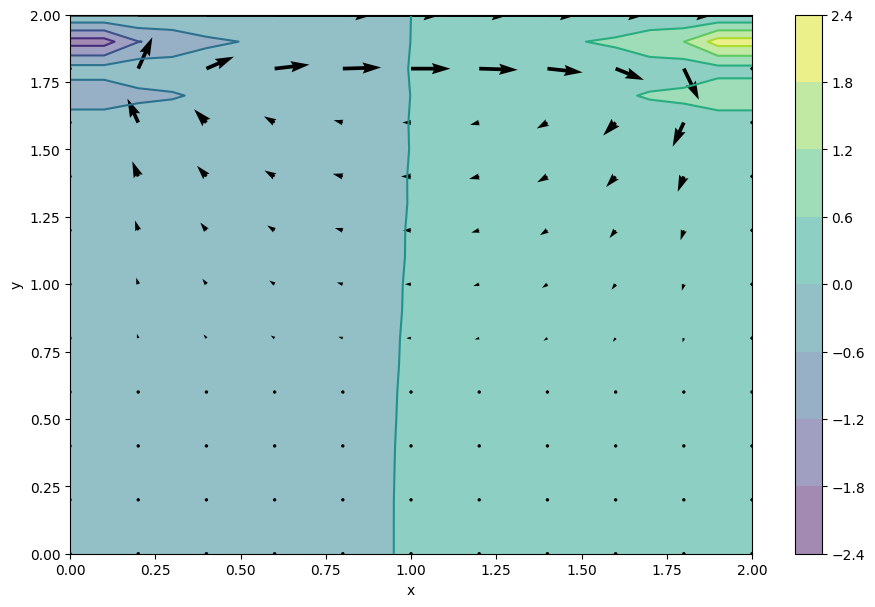

In [11]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()

plt.contour(X, Y, p.T, cmap=cm.viridis)

plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2].T, v[::2, ::2].T)
plt.xlabel('x')
plt.ylabel('y')

In [12]:
u = np.zeros((nx, ny))
v = np.zeros((nx, ny))
p = np.zeros((nx, ny))
b = np.zeros((nx, ny))
nt = 700
print(nt)
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

700


Text(0, 0.5, 'y')

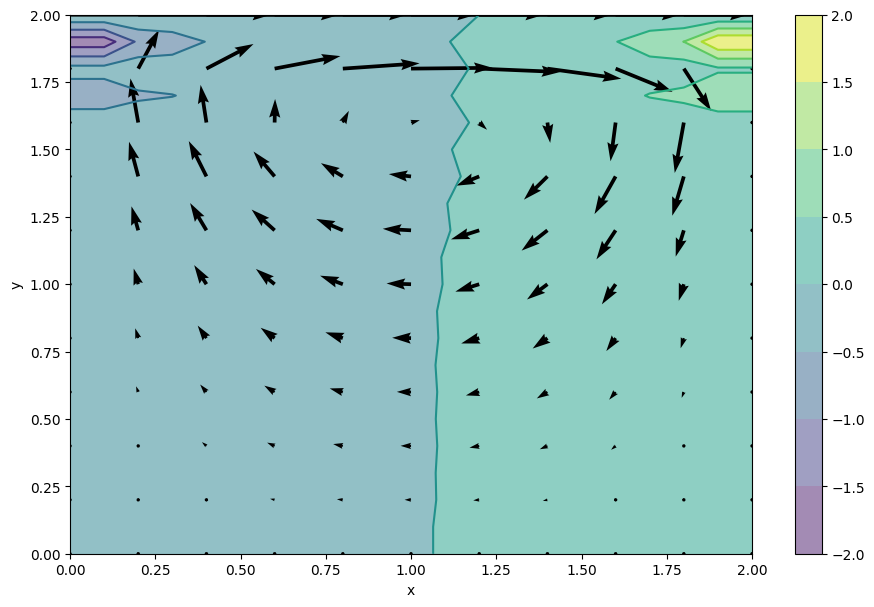

In [13]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()

plt.contour(X, Y, p.T, cmap=cm.viridis)

plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2].T, v[::2, ::2].T)
plt.xlabel('x')
plt.ylabel('y')

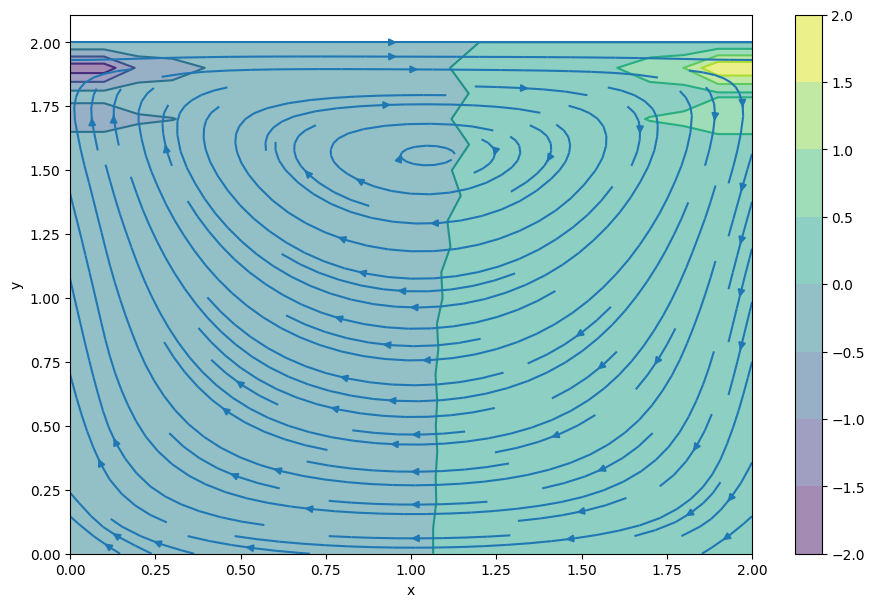

In [14]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p.T, cmap=cm.viridis)
plt.streamplot(X, Y, u.T, v.T)
plt.xlabel('x')
plt.ylabel('y');

In [16]:
X_train = np.column_stack((X.ravel(), Y.ravel()))
u_train = u.ravel()
v_train = v.ravel()
p_train = p.ravel()

In [18]:
import tensorflow as tf

In [22]:
input_layer = tf.keras.layers.Input(shape=(2,))
hidden_layer_1 = tf.keras.layers.Dense(64, activation='tanh')(input_layer)
hidden_layer_2 = tf.keras.layers.Dense(64, activation='tanh')(hidden_layer_1)
hidden_layer_3 = tf.keras.layers.Dense(64, activation='tanh')(hidden_layer_2)

u_output = tf.keras.layers.Dense(1, activation='linear')(hidden_layer_3)
v_output = tf.keras.layers.Dense(1, activation='linear')(hidden_layer_3)
p_output = tf.keras.layers.Dense(1, activation='linear')(hidden_layer_3)

model = tf.keras.models.Model(inputs=input_layer, outputs=[u_output, v_output, p_output])

In [23]:
model.compile(loss='mse', optimizer='adam')

In [49]:
history=model.fit(X_train, [u_train, v_train, p_train], epochs=10000)

A saída de streaming foi truncada nas últimas 5000 linhas.
14/14 [==============================] - 0s 7ms/step - loss: 3.0581e-04 - dense_9_loss: 1.7704e-05 - dense_10_loss: 1.5985e-05 - dense_11_loss: 2.7212e-04
Epoch 7502/10000
14/14 [==============================] - 0s 8ms/step - loss: 2.7177e-04 - dense_9_loss: 3.3923e-05 - dense_10_loss: 2.1751e-05 - dense_11_loss: 2.1610e-04
Epoch 7503/10000
14/14 [==============================] - 0s 7ms/step - loss: 2.7744e-04 - dense_9_loss: 2.6946e-05 - dense_10_loss: 2.7007e-05 - dense_11_loss: 2.2349e-04
Epoch 7504/10000
14/14 [==============================] - 0s 7ms/step - loss: 2.7099e-04 - dense_9_loss: 3.0300e-05 - dense_10_loss: 2.5635e-05 - dense_11_loss: 2.1505e-04
Epoch 7505/10000
14/14 [==============================] - 0s 6ms/step - loss: 2.5408e-04 - dense_9_loss: 1.6722e-05 - dense_10_loss: 1.9529e-05 - dense_11_loss: 2.1783e-04
Epoch 7506/10000
14/14 [==============================] - 0s 4ms/step - loss: 3.8026e-04 - dense_9

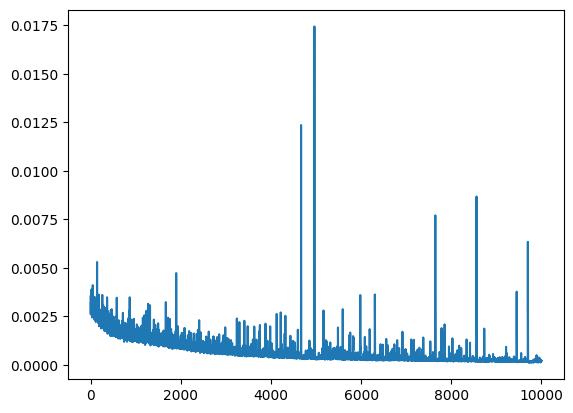

In [83]:
x_max = 100

# Solving for A
A = 10000  # y_max

# Solving for B
B = np.log(A) / x_max

def exponential_function(x):
    return A * np.exp(B * x)

x_values = np.linspace(x_max, -1000, 1000)
y_values = exponential_function(x_values)

loss=history.history['loss']

#plt.plot(y_values)
plt.plot(loss)
plt.show()

In [87]:
y_test=model.predict(X_train)
resid=np.array([u_train, v_train, p_train]) - np.array(y_test).reshape(3,441)

14/14 [==============================] - 0s 2ms/step


In [100]:
uhat = y_test[0].reshape(21,21)
vhat = y_test[1].reshape(21,21)
phat = y_test[2].reshape(21,21)

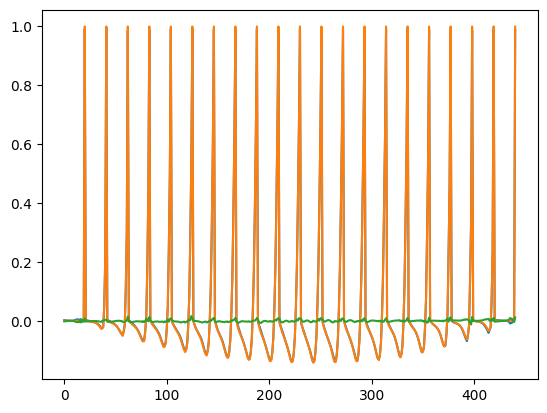

In [102]:
plt.plot(y_test[0])
plt.plot(u_train)
plt.plot(resid[0])

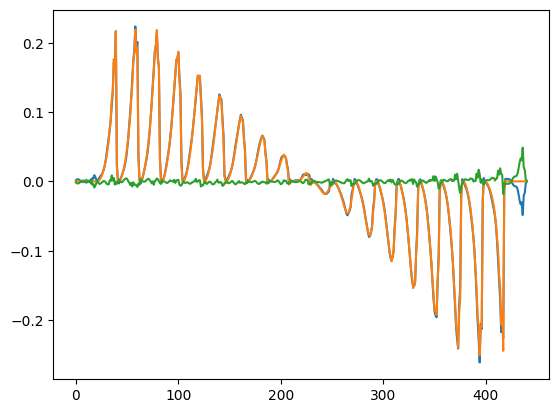

In [93]:
plt.plot(y_test[1])
plt.plot(v_train)
plt.plot(resid[1])

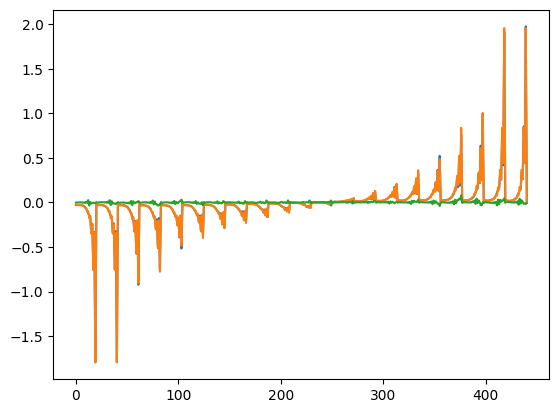

In [94]:
plt.plot(y_test[2])
plt.plot(p_train)
plt.plot(resid[2])

Text(0, 0.5, 'y')

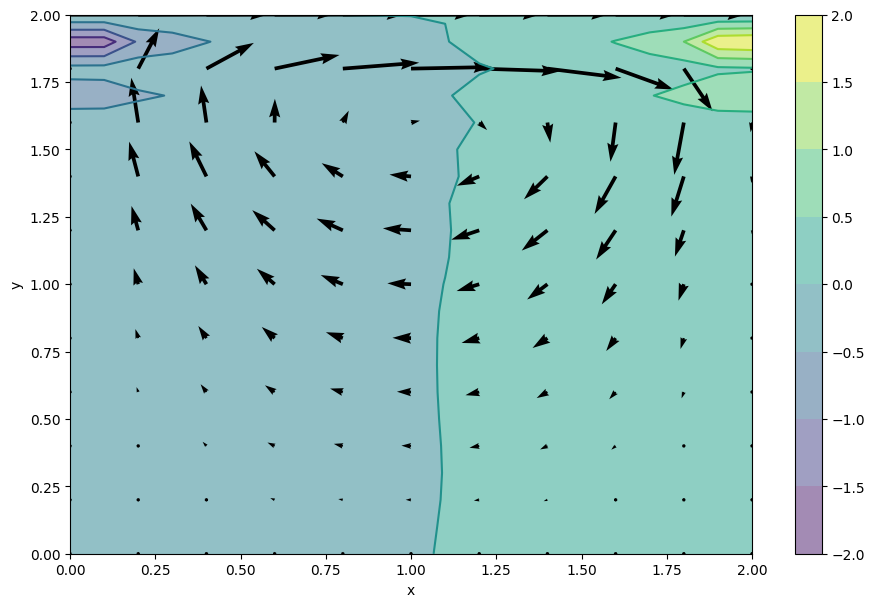

In [103]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X, Y, phat.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()

plt.contour(X, Y, phat.T, cmap=cm.viridis)

plt.quiver(X[::2, ::2], Y[::2, ::2], uhat[::2, ::2].T, vhat[::2, ::2].T)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

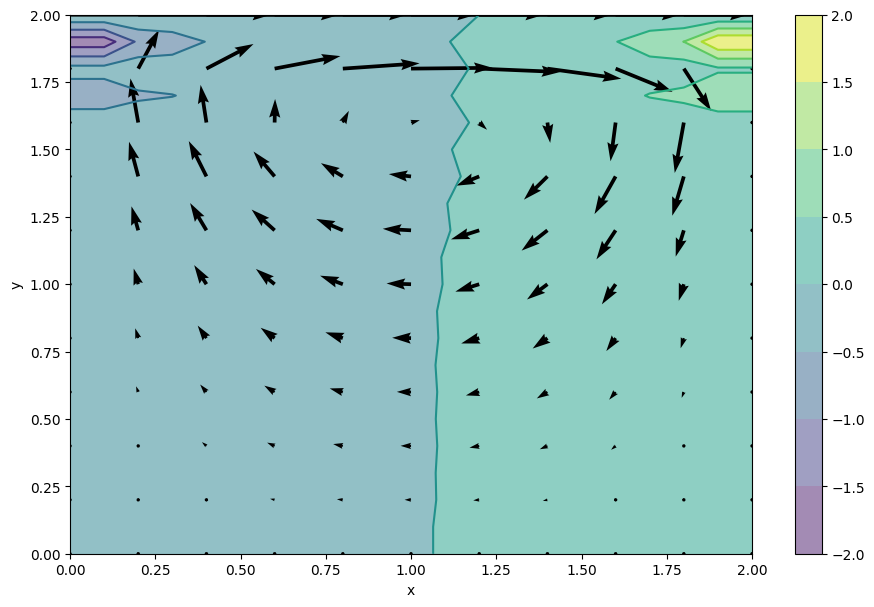

In [104]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()

plt.contour(X, Y, p.T, cmap=cm.viridis)

plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2].T, v[::2, ::2].T)
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

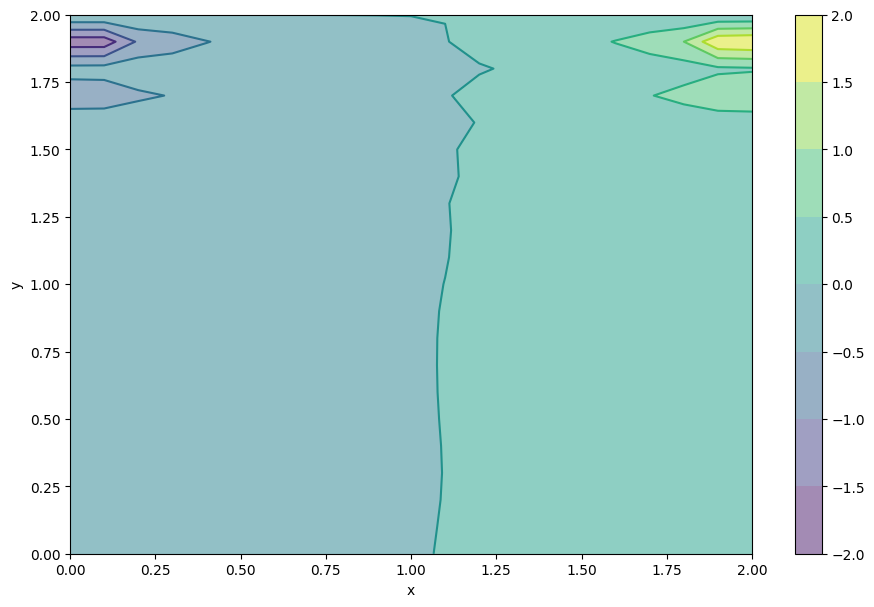

In [108]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X, Y, phat.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()

plt.contour(X, Y, phat.T, cmap=cm.viridis)

plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

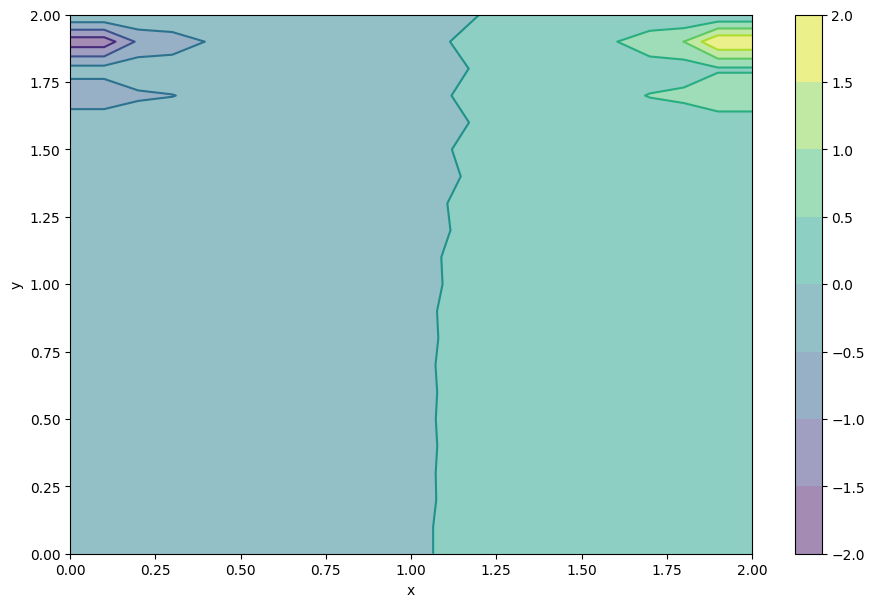

In [109]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()

plt.contour(X, Y, p.T, cmap=cm.viridis)

plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

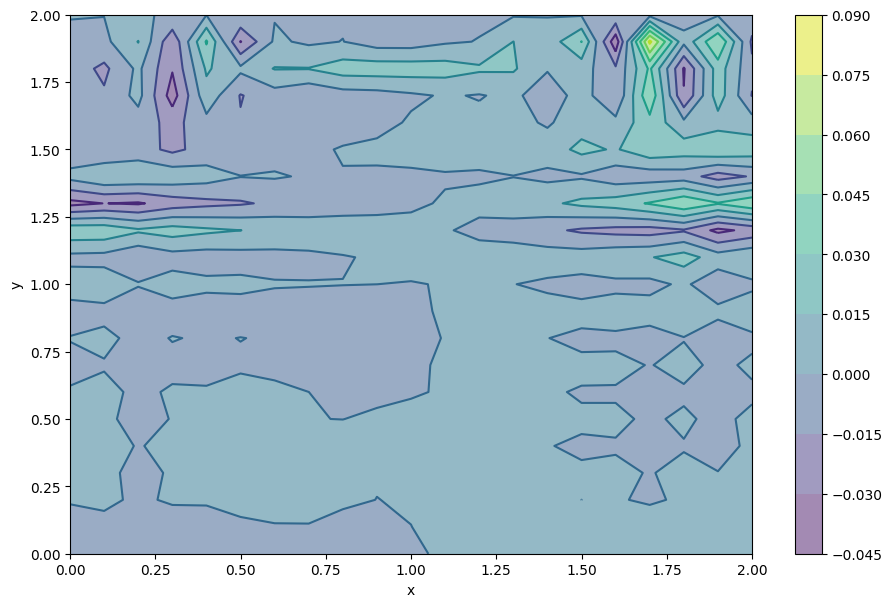

In [107]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.contourf(X, Y, resid[2].reshape(21,21).T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()

plt.contour(X, Y, resid[2].reshape(21,21).T, cmap=cm.viridis)

plt.xlabel('x')
plt.ylabel('y')

In [115]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

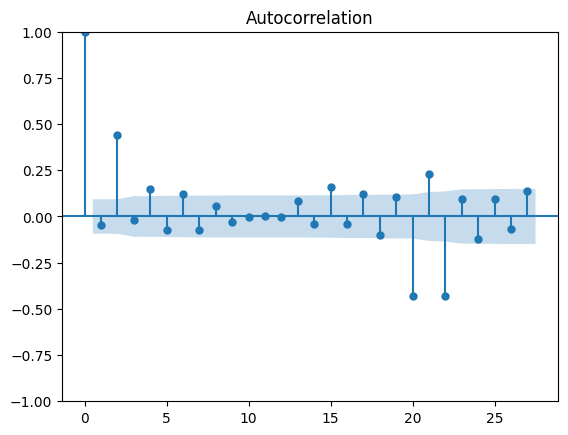

In [112]:
# VISUALIZING AUTOCORRELATION
plot_acf(resid[2])
plt.show()

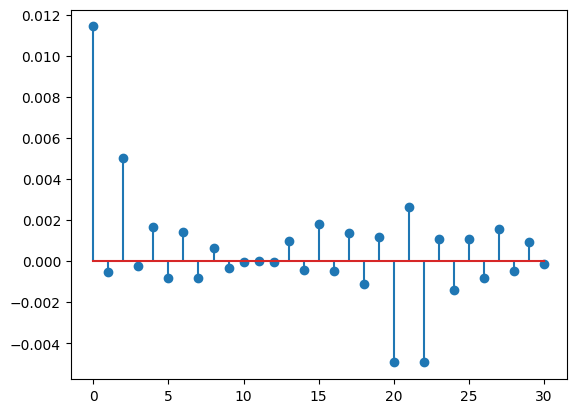

In [117]:
plt.figure()
a = acf(resid[2], nlags=30)
plt.stem(a*np.sqrt(np.mean(resid[2]**2.0)))
plt.show()

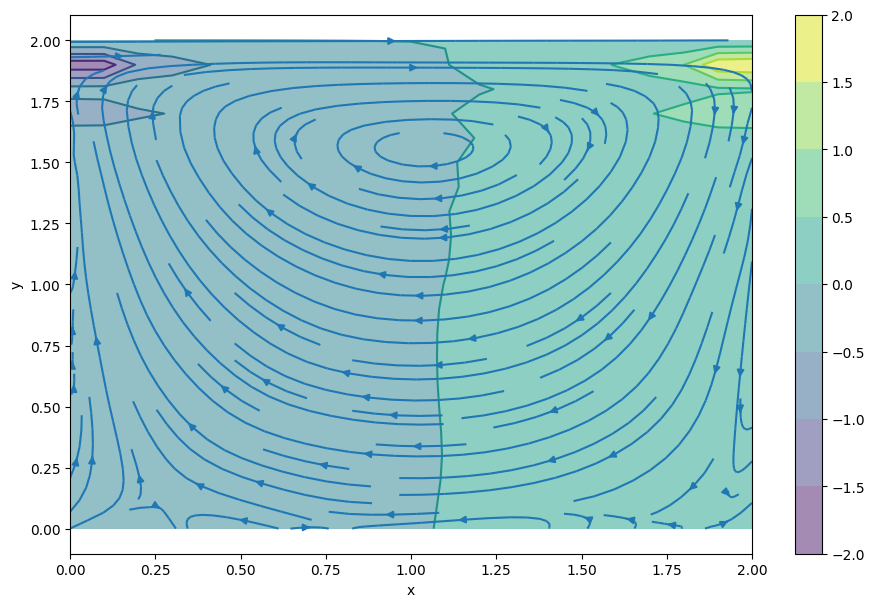

In [118]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, phat.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, phat.T, cmap=cm.viridis)
plt.streamplot(X, Y, uhat.T, vhat.T)
plt.xlabel('x')
plt.ylabel('y');

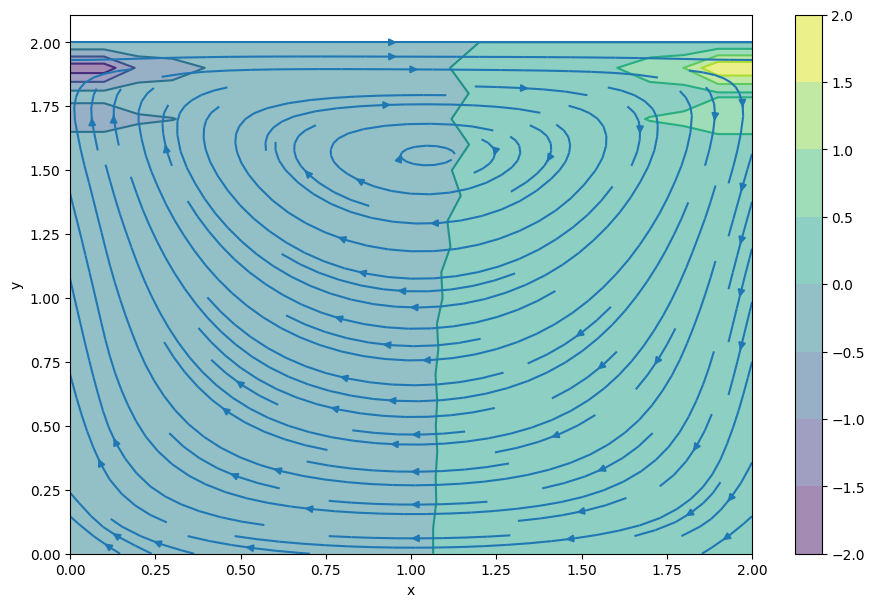

In [119]:
fig = plt.figure(figsize=(11, 7), dpi=100)
plt.contourf(X, Y, p.T, alpha=0.5, cmap=cm.viridis)
plt.colorbar()
plt.contour(X, Y, p.T, cmap=cm.viridis)
plt.streamplot(X, Y, u.T, v.T)
plt.xlabel('x')
plt.ylabel('y');